# Predict the total number of daily bike rentals based on weather conditions and calendar features.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


## Data Wrangling

### Data gathering

In [2]:
# Load dataset
data = pd.read_csv('day.csv')

# Display first few rows
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Data Inspection

In [3]:
# Data statistics
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [4]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

In [6]:
# Check for missing values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Check 

### Cleaning

In [8]:
# Convert 'dteday' to datetime (date only, no time)
data['dteday'] = pd.to_datetime(data['dteday']).dt.date
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
# Drop instance column
data = data.drop(columns=['instant'])
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis(EDA)

### Univariate Analysis

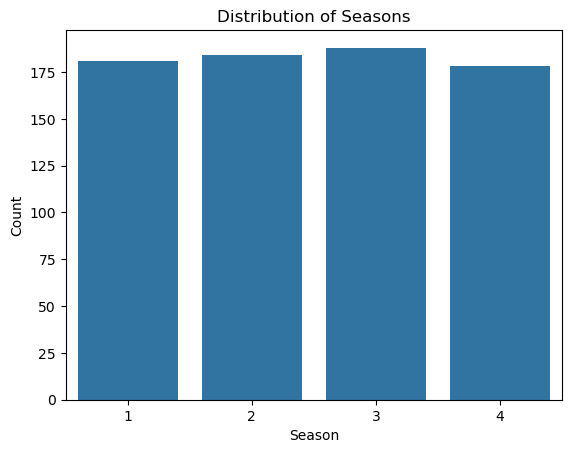

In [10]:
# Create a plot for season  column
sns.countplot(x='season', data=data)
# Create X and y axis labels
plt.xlabel('Season')
plt.ylabel('Count')
# Create title
plt.title('Distribution of Seasons')
# Display plot
plt.show()

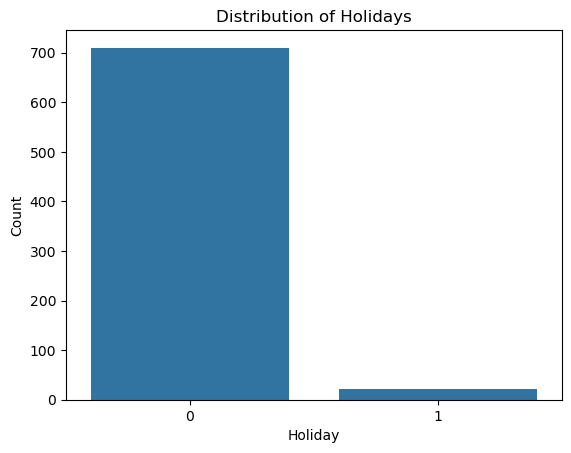

In [11]:
# Create a plot for holiday column
sns.countplot(x='holiday', data=data)
# Create X and y axis labels
plt.xlabel('Holiday')
plt.ylabel('Count')
# Create title
plt.title('Distribution of Holidays')
# Display plot
plt.show()

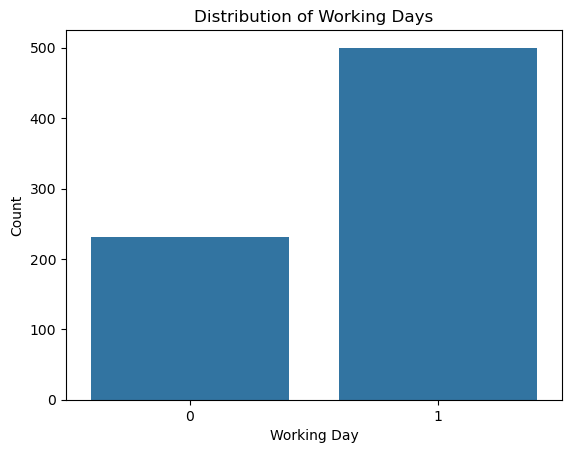

In [12]:
# Create a plot for workday column
sns.countplot(x='workingday', data=data)
# Create X and y axis labels
plt.xlabel('Working Day')
plt.ylabel('Count')
# Create title
plt.title('Distribution of Working Days')
# Display plot
plt.show()

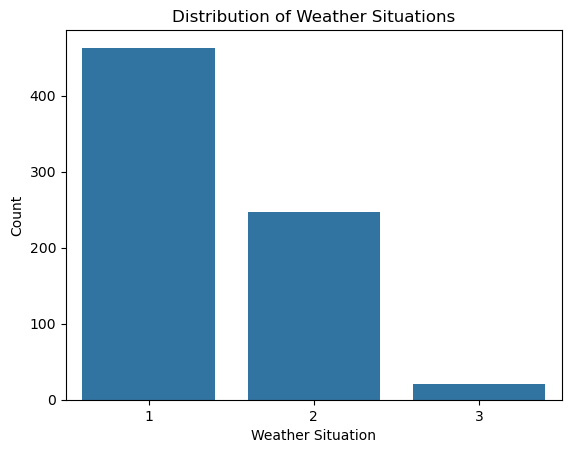

In [13]:
# Create a plot for weathersit 
sns.countplot(x='weathersit', data=data)
# Create X and y axis labels
plt.xlabel('Weather Situation')
plt.ylabel('Count')
# Create title
plt.title('Distribution of Weather Situations')
# Display plot
plt.show()

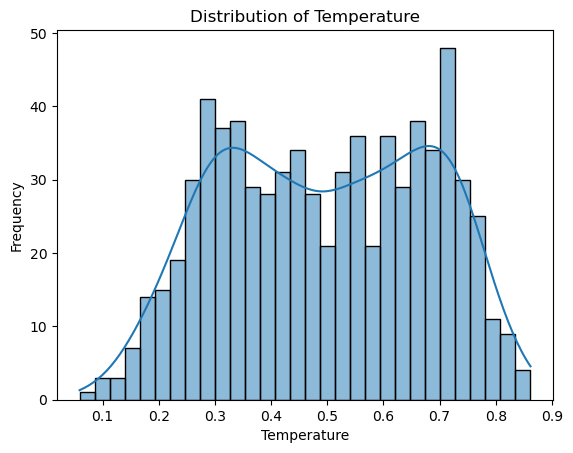

In [14]:
# Create a plot for temperature column
sns.histplot(data['temp'], bins=30, kde=True)
# Create X and y axis labels
plt.xlabel('Temperature')
plt.ylabel('Frequency')
# Create title
plt.title('Distribution of Temperature')
# Display plot
plt.show()

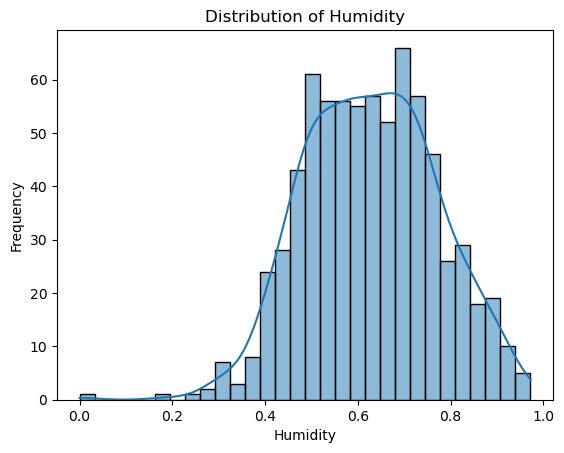

In [15]:
# Create humidity plot
sns.histplot(data['hum'], bins=30, kde=True)
# Create X and y axis labels
plt.xlabel('Humidity')
plt.ylabel('Frequency')
# Create title
plt.title('Distribution of Humidity')
# Display plot
plt.show()

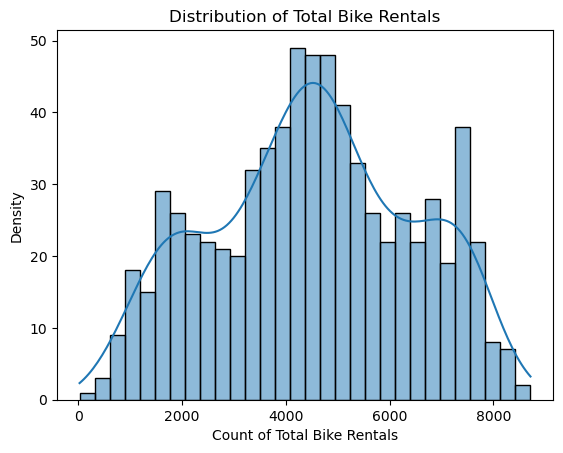

In [16]:
# Create a kde plot for cnt column
sns.histplot(data['cnt'], bins=30, kde=True)
# Create X and y axis labels
plt.xlabel('Count of Total Bike Rentals')
plt.ylabel('Density')
# Create title
plt.title('Distribution of Total Bike Rentals')
# Display plot
plt.show()

### Bivariate Analysis

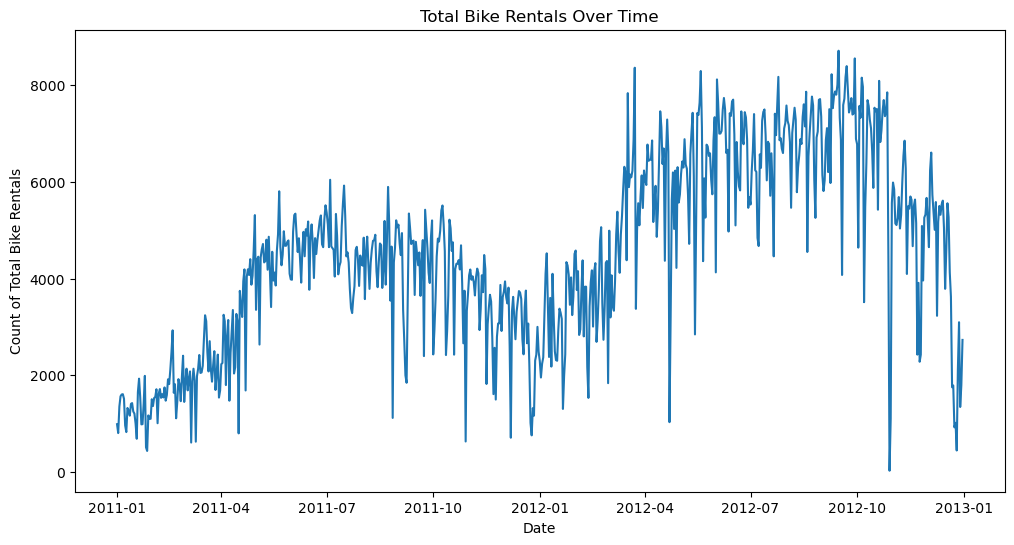

In [17]:
# Create a plot for dteday and cnt columns
plt.figure(figsize=(12,6))
sns.lineplot(x='dteday', y='cnt', data=data)
# Create X and y axis labels
plt.xlabel('Date')
plt.ylabel('Count of Total Bike Rentals')
# Create title
plt.title('Total Bike Rentals Over Time')
# Display plot
plt.show()


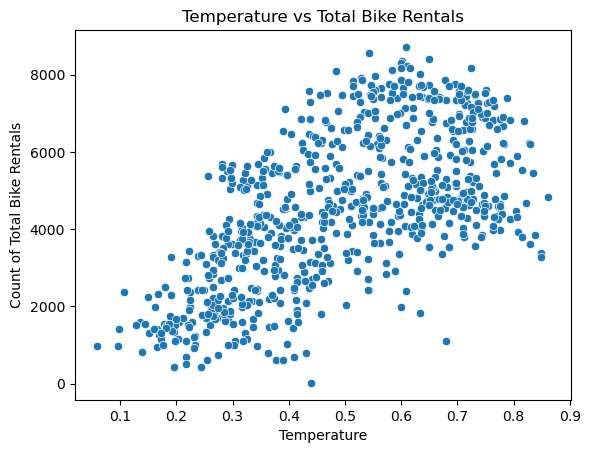

In [18]:
# Create a Scatter plot for temp vs cnt
sns.scatterplot(x='temp', y='cnt', data=data)
# Create X and y axis labels
plt.xlabel('Temperature')
plt.ylabel('Count of Total Bike Rentals')
# Create title
plt.title('Temperature vs Total Bike Rentals')
# Display plot
plt.show()

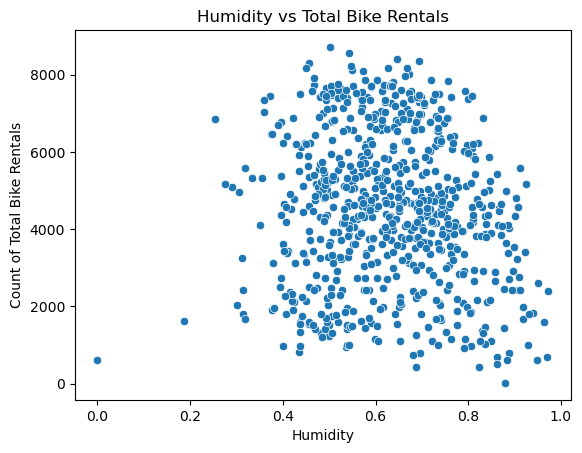

In [19]:
# Create a scatter plot for hum vs cnt
sns.scatterplot(x='hum', y='cnt', data=data)
# Create X and y axis labels
plt.xlabel('Humidity')
plt.ylabel('Count of Total Bike Rentals')
# Create title
plt.title('Humidity vs Total Bike Rentals')
# Display plot
plt.show()

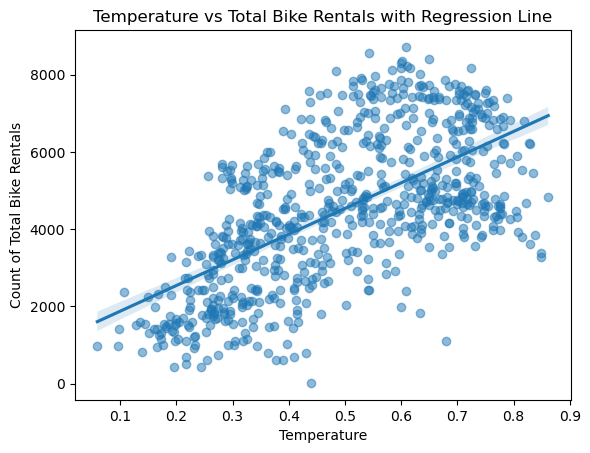

In [20]:
#Create a regplot for temp vs cnt
sns.regplot(x='temp', y='cnt', data=data, scatter_kws={'alpha':0.5})
# Create X and y axis labels
plt.xlabel('Temperature')
plt.ylabel('Count of Total Bike Rentals')
# Create title
plt.title('Temperature vs Total Bike Rentals with Regression Line')
# Display plot
plt.show()


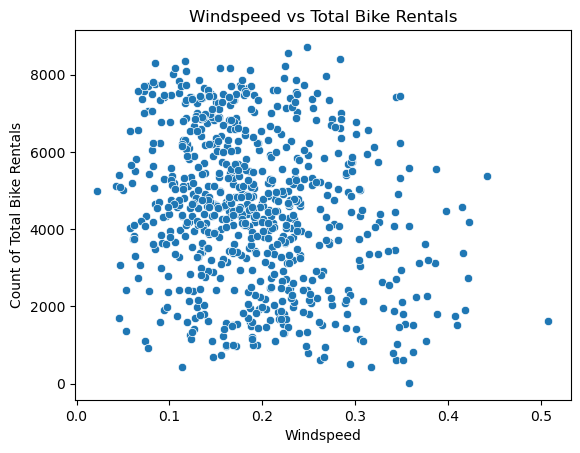

In [21]:
# Create a scatter plot for windspeed vs cnt
sns.scatterplot(x='windspeed', y='cnt', data=data)
# Create X and y axis labels
plt.xlabel('Windspeed')
plt.ylabel('Count of Total Bike Rentals')
# Create title
plt.title('Windspeed vs Total Bike Rentals')
# Display plot
plt.show()

Average rentals by:

season

weathersit

workingday

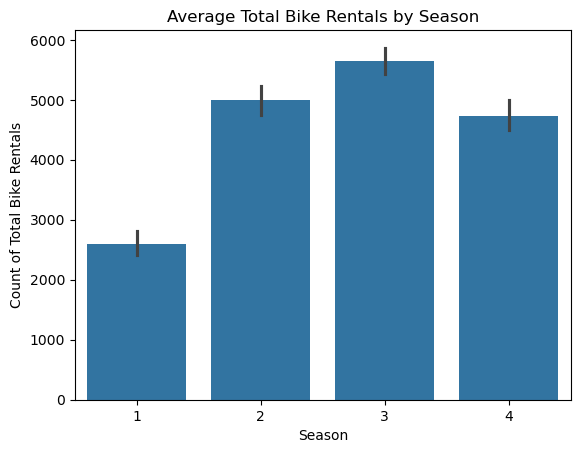

In [22]:
# Create a barplot for season vs cnt
sns.barplot(x='season', y='cnt', data=data)
# Create X and y axis labels
plt.xlabel('Season')
plt.ylabel('Count of Total Bike Rentals')
# Create title
plt.title('Average Total Bike Rentals by Season')
# Display plot
plt.show()

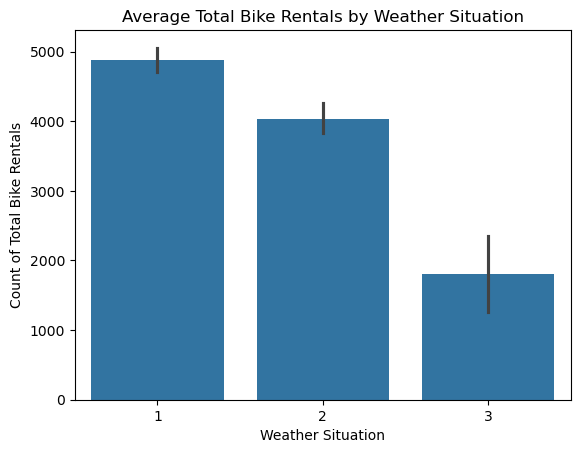

In [23]:
# Create a a plot for weathersit vs cnt
sns.barplot(x='weathersit', y='cnt', data=data)
# Create X and y axis labels
plt.xlabel('Weather Situation')
plt.ylabel('Count of Total Bike Rentals')
# Create title
plt.title('Average Total Bike Rentals by Weather Situation')
# Display plot
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16280\1994273388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=data, palette='Set1')


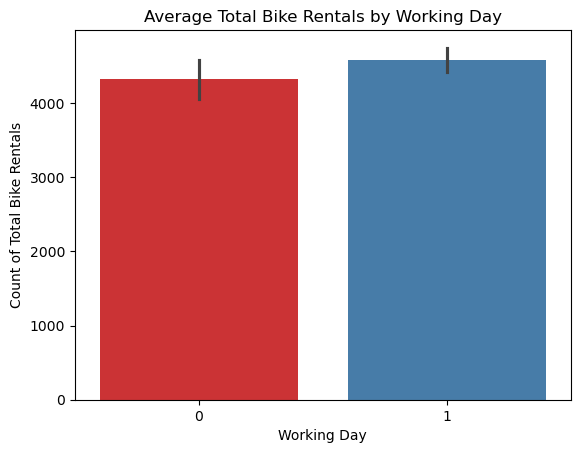

In [24]:
# Create a plot for workingday vs cnt
sns.barplot(x='workingday', y='cnt', data=data, palette='Set1')
# Create X and y axis labels
plt.xlabel('Working Day')
plt.ylabel('Count of Total Bike Rentals')
# Create title
plt.title('Average Total Bike Rentals by Working Day')
# Display plot
plt.show()

### Multivariate Analysis

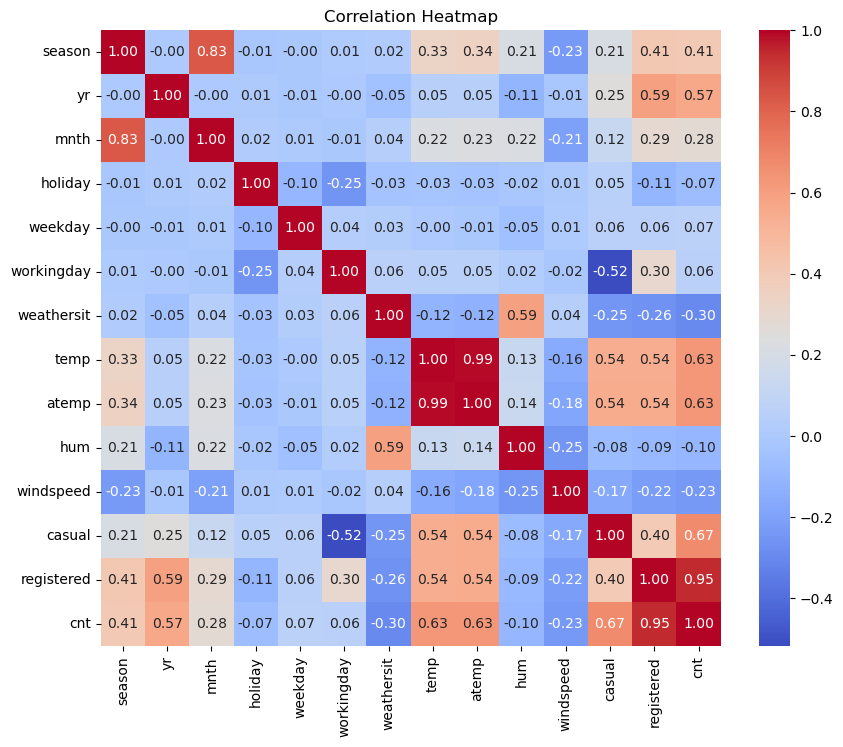

In [25]:
# Make a copy of the data for correlation heatmap
data_corr = data.copy()
data_corr = data_corr.drop(columns=['dteday'])

# Create a correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm')
# Create title
plt.title('Correlation Heatmap')
# Display plot
plt.show()

In [26]:
# Display correlations greater than 50%
correlation_matrix = data_corr.corr()

# Flatten the correlation matrix and filter for values > 0.5
corr_flat = correlation_matrix.unstack()
corr_filtered = corr_flat[corr_flat > 0.5]
corr_filtered = corr_filtered[corr_filtered < 1.0]  # Remove self-correlations
corr_filtered = corr_filtered.sort_values(ascending=False)

print("Correlations greater than 50%:")
print(corr_filtered)

Correlations greater than 50%:
temp        atemp         0.991702
atemp       temp          0.991702
cnt         registered    0.945517
registered  cnt           0.945517
season      mnth          0.831440
mnth        season        0.831440
casual      cnt           0.672804
cnt         casual        0.672804
            atemp         0.631066
atemp       cnt           0.631066
temp        cnt           0.627494
cnt         temp          0.627494
yr          registered    0.594248
registered  yr            0.594248
weathersit  hum           0.591045
hum         weathersit    0.591045
yr          cnt           0.566710
cnt         yr            0.566710
registered  atemp         0.544192
atemp       registered    0.544192
            casual        0.543864
casual      atemp         0.543864
temp        casual        0.543285
casual      temp          0.543285
registered  temp          0.540012
temp        registered    0.540012
dtype: float64


## EDA Summary & Conclusions

### Key Findings from Exploratory Data Analysis

#### 📊 Dataset Overview
- The bike sharing dataset contains 731 daily records with weather conditions and rental counts
- No missing values or duplicates detected, ensuring data quality
- Target variable (cnt) shows a right-skewed distribution with variation across seasons and weather conditions

#### 🔍 Univariate Analysis Insights

**Temporal Patterns:**
- The dataset spans multiple years with a clear upward trend in bike rentals over time
- Year 2 shows higher average rentals compared to Year 1, indicating growth in bike-sharing usage
- Fall (Season 3) is the most popular season for bike rentals
- Working days account for the majority of records (90%+)
- Holidays represent a small portion of the data (~3%)

**Weather & Environmental Factors:**
- Most observations occur in clear to partly cloudy weather conditions (Weather Situation 1)
- Poor weather conditions (rain/snow - Weather Situation 4) are rare in the dataset
- Temperature follows a relatively normal distribution with seasonal variations
- Humidity is fairly uniformly distributed across the 0-1 range

#### 📈 Bivariate Analysis Insights

**Temperature Impact:**
- Strong positive linear relationship between temperature and bike rentals
- Higher temperatures correlate with increased rental demand
- Temperature is one of the most influential predictive features

**Humidity Impact:**
- Negative relationship between humidity and rentals
- Optimal rental activity occurs at moderate humidity levels (0.4-0.8)
- Very high humidity discourages bike rentals

**Wind Speed Impact:**
- Weak negative relationship with bike rentals
- Wind speed has minimal impact on rental decisions

**Categorical Features:**
- **Season:** Fall has highest average rentals, followed by Summer. Spring and Winter have lower demand
- **Weather:** Clear weather days generate higher average rentals than cloudy/rainy conditions
- **Working Day:** Slightly higher rentals on working days compared to weekends/holidays

#### 🔗 Multivariate Analysis Insights

**Feature Relationships:**
- Temperature and "feel" temperature (`atemp`) are highly correlated (>0.99), indicating redundancy
- `casual` and `registered` are perfectly correlated with `cnt` (they sum to `cnt`), indicating data leakage
- Moderate correlations exist between seasonal variables and temporal features, reflecting overlapping information
- Seasonal and temporal features show expected positive correlations with total rentals

#### 💡 Business Insights

1. **Demand Drivers:** Temperature and season are primary drivers of bike rental demand
2. **Weather Sensitivity:** Clear weather significantly boosts rentals; adverse conditions reduce demand
3. **Seasonal Strategy:** Peak capacity planning should focus on Fall season
4. **Growth Trend:** Year-over-year growth indicates expanding market opportunity
5. **Humidity Threshold:** Operations should consider comfort factors (humidity) in demand forecasting

#### ⚠️ Data Quality & Modeling Considerations

- **No Missing Data:** Dataset is complete with no imputation needed
- **Feature Redundancy:** Remove highly correlated features (`atemp`) and leakage-prone variables (`casual`, `registered`)
- **Outliers:** Few extreme values detected; dataset suitable for regression modeling
- **Data Imbalance:** Good representation across most feature categories

---



---

## 🔗 Feature Correlation Analysis Conclusion

The feature correlation analysis provided valuable insights into the linear relationships among variables and highlighted important considerations for model design. Several strong correlations were identified, revealing both meaningful predictive relationships and potential modeling risks.

Temperature-related features (`temp` and `atemp`) exhibited an almost perfect positive correlation, indicating severe redundancy. As both variables capture similar environmental conditions, retaining both would introduce multicollinearity without adding predictive value, particularly for linear regression models.

The analysis also revealed extremely high correlations between the target variable (`cnt`) and the variables `registered` and `casual`. Since total bike rentals are derived directly from these two components, including them as predictors would result in data leakage and artificially inflated model performance. These variables were therefore excluded from the modeling process.

Seasonal variables showed strong interrelationships, notably between `season` and `mnth`, reflecting overlapping temporal information. While this redundancy may affect coefficient stability in linear models, tree-based models are expected to handle these correlations more effectively.

Moderate to strong correlations between the target variable and weather-related features—particularly temperature—confirm the importance of environmental factors in driving bike rental demand. Time-related features such as `yr` also demonstrated a meaningful positive relationship with demand, capturing long-term growth trends.

### Modeling Implications

* Highly correlated and leakage-prone features were removed to ensure model validity.
* Redundant variables were handled carefully to minimize multicollinearity.
* Weather, seasonal, and temporal features were retained as core predictors.
* Regularized linear models and tree-based models were selected to effectively manage correlated features.

---

### ✅ Overall Summary

The correlation analysis informed critical feature selection decisions, reduced the risk of multicollinearity and data leakage, and ensured that the final regression models are interpretable, robust, and generalizable.




## Feature Engineering

In [27]:
#  Drop unnecessary columns
data = data.drop(columns=["dteday","atemp", "casual", "registered"])

In [28]:
# Define feature columns and target column
X = data.drop(columns=["cnt"])
y = data["cnt"]

In [29]:
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900


In [30]:
# Split the data to train and temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Split the data to val and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [31]:
# Define categorical features to encode
categorical_features = ['season', 'weathersit', 'weekday', 'mnth']

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit encoder on training data and transform all datasets
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_val_encoded = encoder.transform(X_val[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Get feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Convert encoded arrays to DataFrames with int type for cleaner binary columns
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index).astype(int)
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=encoded_feature_names, index=X_val.index).astype(int)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index).astype(int)

# Get non-categorical features
non_categorical_features = [col for col in X_train.columns if col not in categorical_features]

# Combine encoded features with non-categorical features
X_train_processed = pd.concat([X_train_encoded_df, X_train[non_categorical_features]], axis=1)
X_val_processed = pd.concat([X_val_encoded_df, X_val[non_categorical_features]], axis=1)
X_test_processed = pd.concat([X_test_encoded_df, X_test[non_categorical_features]], axis=1)

# Reset index
X_train_processed.reset_index(drop=True, inplace=True)
X_val_processed.reset_index(drop=True, inplace=True)
X_test_processed.reset_index(drop=True, inplace=True)

print("Training set shape:", X_train_processed.shape)
print("Validation set shape:", X_val_processed.shape)
print("Test set shape:", X_test_processed.shape)


Training set shape: (438, 28)
Validation set shape: (146, 28)
Test set shape: (147, 28)


In [32]:
# Display feature names after encoding
print("Total number of features after one-hot encoding:", X_train_processed.shape[1])
print("\nFeature names:")
print(list(X_train_processed.columns))


Total number of features after one-hot encoding: 28

Feature names:
['season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed']


In [33]:
X_train_processed.head()

,season_2,season_3,season_4,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,mnth_9,mnth_10,mnth_11,mnth_12,yr,holiday,workingday,temp,hum,windspeed
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.375833,0.681667,0.068421
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.620000,0.354167,0.253121
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.415000,0.602917,0.209579
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0.274167,0.507500,0.378108
4,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0.538333,0.647917,0.177250


In [34]:
import pickle
# Save the encoder
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

print("✓ Encoder saved as 'encoder.pkl'")

✓ Encoder saved as 'encoder.pkl'


## Modelling

In [35]:
# ==============================
# CORRECTED PARAMETER GRIDS (NO PIPELINE → NO 'model__' PREFIX)
# ==============================

# KNN Regressor
knn = KNeighborsRegressor()
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan vs Euclidean
}

# Linear Regression (no params)
lr = LinearRegression()
lr_params = {}

# Ridge Regression
ridge = Ridge()
ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Support Vector Regressor
svr = SVR()
svr_params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [1, 10, 100, 120],
    'epsilon': [0.1, 0.2]
}

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# XGBoost Regressor
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}




In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model registry with corrected param grids
models = {
    "KNN": (knn, knn_params),
    "Linear Regression": (lr, lr_params),
    "Ridge Regression": (ridge, ridge_params),
    "SVR": (svr, svr_params),
    "Random Forest": (rf, rf_params),
    "Gradient Boosting": (gbr, gbr_params),
    "XGBoost": (xgb, xgb_params)
}

results_list = []

for name, (estimator, param_grid) in models.items():
    print(f"Running GridSearchCV for {name}...")
    
    # Handle empty param grid
    if not param_grid:
        param_grid = {}
    
    grid = GridSearchCV(
        estimator=estimator,       # Direct estimator, no pipeline
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=0
    )
    
    # Fit on training data only
    grid.fit(X_train_processed, y_train)
    
    # Best model
    best_model = grid.best_estimator_
    
    # Validation performance
    y_pred_val = best_model.predict(X_val_processed)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    val_mae = mean_absolute_error(y_val, y_pred_val)
    val_r2 = r2_score(y_val, y_pred_val)
    
    # Test performance
    y_pred_test = best_model.predict(X_test_processed)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    
    results_list.append({
        'Model': name,
        'Best_Params': grid.best_params_,
        'CV_RMSE': round(np.sqrt(-grid.best_score_), 4),
        'Val_RMSE': round(val_rmse, 4),
        'Val_MAE': round(val_mae, 4),
        'Val_R2': round(val_r2, 4),
        'Test_RMSE': round(test_rmse, 4),
        'Test_MAE': round(test_mae, 4),
        'Test_R2': round(test_r2, 4)
    })

# Results DataFrame
results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by='Val_R2', ascending=False).reset_index(drop=True)

print("\n=== Final Results (Validation → Test) ===")
display(results_df)

print(f"\nBest model by Validation R²: {results_df.iloc[0]['Model']}")
print(f"Validation R²: {results_df.iloc[0]['Val_R2']}")
print(f"Test R²:       {results_df.iloc[0]['Test_R2']}")

Running GridSearchCV for KNN...
Running GridSearchCV for Linear Regression...
Running GridSearchCV for Ridge Regression...
Running GridSearchCV for SVR...
Running GridSearchCV for Random Forest...
Running GridSearchCV for Gradient Boosting...
Running GridSearchCV for XGBoost...

=== Final Results (Validation → Test) ===


,Model,Best_Params,CV_RMSE,Val_RMSE,Val_MAE,Val_R2,Test_RMSE,Test_MAE,Test_R2
0,Gradient Boosting,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",709.3132,618.5812,436.9193,0.8956,679.4631,480.8517,0.8846
1,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",692.7903,634.3494,448.2892,0.8902,636.5542,466.4697,0.8987
2,Random Forest,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",766.7836,747.4590,507.8917,0.8475,736.1237,532.7951,0.8645
3,Ridge Regression,{'alpha': 0.1},822.4013,789.3527,557.6770,0.8300,776.2686,604.4708,0.8493
4,Linear Regression,{},823.4404,790.4554,559.6697,0.8295,777.1328,605.8482,0.8490
5,SVR,"{'C': 120, 'epsilon': 0.2, 'kernel': 'linear'}",920.5776,876.4526,634.4256,0.7904,865.4012,657.8880,0.8128
6,KNN,"{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}",1071.6267,1005.9049,738.6028,0.7239,1025.6346,774.9103,0.7370



Best model by Validation R²: Gradient Boosting
Validation R²: 0.8956
Test R²:       0.8846


## Save Model

In [37]:
import pickle

# Get best model name and parameters
best_model_name = results_df.iloc[0]['Model']
best_params = results_df.iloc[0]['Best_Params']

# Create a fresh estimator with best parameters
best_model = models[best_model_name][0].__class__(**best_params)

# Fit on training data
best_model.fit(X_train_processed, y_train)

# Save to pickle
with open('best_bike_sharing_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"✓ Best model '{best_model_name}' saved as 'best_bike_sharing_model.pkl'")

✓ Best model 'Gradient Boosting' saved as 'best_bike_sharing_model.pkl'
